In [1]:
# Exploratory Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Clustering Analysis 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Ignore Warning 
import warnings
warnings.filterwarnings('ignore')

## Load the Data

In [2]:
df = pd.read_csv('climate_change.csv')

In [3]:
df.head()

,id,date,total_agr_land,workforce,trees,arable_land,ley,perm_grass,perm_crops,prot_cult,...,network,GHG_goal,env_goal,biodiv_goal,acknow_goal,yield_goal,income_goal,info_gew,info_resul,interviewtime
0,1,13.03.2019 10:59,4925.0,1.95406,79,3871,107,793,140,0,...,2,1,5,6,4,3,2,2,2,999.53
1,2,13.03.2019 11:08,2176.0,6.61310,12,1671,0,98,338,119,...,1,3,4,2,1,6,5,2,2,901.99
2,3,13.03.2019 11:37,2251.0,1.39384,31,1507,279,380,81,0,...,3,1,4,2,3,6,5,1,1,1832.99
3,4,13.03.2019 13:54,2389.0,1.99523,3,1969,71,322,0,0,...,1,2,5,4,1,3,6,2,1,2001.28
4,5,13.03.2019 14:18,3205.0,3.09942,39,1911,675,461,117,0,...,3,1,6,3,2,5,4,2,2,1809.30


In [4]:
# Page 2 - 7 
df = df.iloc[:, :88]
df.head()

,id,date,total_agr_land,workforce,trees,arable_land,ley,perm_grass,perm_crops,prot_cult,...,drag_imag,cov_imag,plough_imag,solar_imag,biog_imag,ecodr_imag,activ_dairy,activ_cattle,activ_pig,activ_poultry
0,1,13.03.2019 10:59,4925.0,1.95406,79,3871,107,793,140,0,...,NaN,NaN,0.0,0.0,0.0,NaN,5,1,5,5
1,2,13.03.2019 11:08,2176.0,6.61310,12,1671,0,98,338,119,...,NaN,NaN,1.0,1.0,NaN,NaN,5,5,5,5
2,3,13.03.2019 11:37,2251.0,1.39384,31,1507,279,380,81,0,...,1.0,0.0,0.0,0.0,0.0,NaN,2,3,5,5
3,4,13.03.2019 13:54,2389.0,1.99523,3,1969,71,322,0,0,...,NaN,NaN,0.0,1.0,1.0,1.0,4,3,4,1
4,5,13.03.2019 14:18,3205.0,3.09942,39,1911,675,461,117,0,...,1.0,0.0,0.0,1.0,0.0,NaN,1,5,5,5


## Split the data based on the question

In [5]:
# AGIS Statistical Infromation (Farmer's Personal Information)
df_agis = df.iloc[:, :32]
df_agis.head()

,id,date,total_agr_land,workforce,trees,arable_land,ley,perm_grass,perm_crops,prot_cult,...,hor_shee_goa,pigs_poultry,pigs,poultry,eco_proof,organic,farmtype,region,age,educ
0,1,13.03.2019 10:59,4925.0,1.95406,79,3871,107,793,140,0,...,0.0000,0.00,0.0,0.00,1.0,0.0,Livestock,Kohlfirst/Rhein,62.0,1
1,2,13.03.2019 11:08,2176.0,6.61310,12,1671,0,98,338,119,...,0.0000,0.00,0.0,0.00,1.0,0.0,Arable farming,Kohlfirst/Rhein,53.0,2
2,3,13.03.2019 11:37,2251.0,1.39384,31,1507,279,380,81,0,...,0.0000,0.05,0.0,0.05,1.0,0.0,Livestock,Kohlfirst/Rhein,60.0,2
3,4,13.03.2019 13:54,2389.0,1.99523,3,1969,71,322,0,0,...,0.0000,52.90,0.0,52.90,1.0,0.0,Livestock,Flaachtal,62.0,2
4,5,13.03.2019 14:18,3205.0,3.09942,39,1911,675,461,117,0,...,1.3424,0.25,0.0,0.25,1.0,0.0,Livestock,Kohlfirst/Rhein,57.0,1


In [6]:
# Assessments of climate change
df_acc = df.iloc[:, 32:45]
df_acc.head()

,cons_general,percep_hail,percep_drought,percep_frost,percep_heavyrain,percep_longrain,percep_heat,cons_farm,self_reduc,self_act,self_cap,self_conf,self_not
0,4,2,2,2,1,2,2,4,1,4,1,1,4
1,5,3,2,2,3,3,3,5,3,3,2,2,2
2,4,2,3,1,1,1,3,4,2,1,2,3,1
3,4,2,2,2,2,2,2,4,3,3,4,4,2
4,5,2,3,2,2,1,3,4,1,2,2,2,2


In [7]:
# Agricultural climate change mitigation
df_accm = df.iloc[:, 45:84]
df_accm.head()

,legum,legum_eff,conc,conc_eff,add,add_eff,lact,lact_eff,breed,breed_eff,...,lact_imag,breed_imag,covman_imag,comp_imag,drag_imag,cov_imag,plough_imag,solar_imag,biog_imag,ecodr_imag
0,2,NaN,2,NaN,2,NaN,3,NaN,2,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN
1,3,NaN,3,NaN,3,NaN,3,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
2,2,4.0,2,1.0,2,1.0,1,1.0,2,2.0,...,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
3,2,3.0,2,3.0,3,4.0,3,2.0,3,2.0,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,1.0,1.0,1.0
4,2,3.0,2,3.0,2,3.0,2,1.0,2,1.0,...,0.0,0.0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,NaN


In [8]:
# Personal values and preferences
df_pvp = df.iloc[:, 84:]
df_pvp.head()

,activ_dairy,activ_cattle,activ_pig,activ_poultry
0,5,1,5,5
1,5,5,5,5
2,2,3,5,5
3,4,3,4,1
4,1,5,5,5


## Cleaning

In [9]:
# Check NaN
dataframe = [df_agis,df_acc,df_accm,df_pvp]

def check_nan(dataframe):
    if dataframe.isnull().values.any() == True:
        return 1
    else:
        return 0

clean_check = [check_nan(data) for data in dataframe]
clean_check

[1, 0, 1, 0]

In [10]:
# Clean Binary NaN
# eff NA = don't know
eff = df_accm.filter(regex='eff').columns.tolist()
df_accm[eff] = df_accm[eff].fillna(0)

# NA= not relevant or already implemented
df_accm = df_accm.replace(np.nan, 3)

# Update to categorical variables
df_accm = df_accm.astype('int').astype('category')
df_accm.head()

,legum,legum_eff,conc,conc_eff,add,add_eff,lact,lact_eff,breed,breed_eff,...,lact_imag,breed_imag,covman_imag,comp_imag,drag_imag,cov_imag,plough_imag,solar_imag,biog_imag,ecodr_imag
0,2,0,2,0,2,0,3,0,2,0,...,3,3,3,0,3,3,0,0,0,3
1,3,0,3,0,3,0,3,0,3,0,...,3,3,3,3,3,3,1,1,3,3
2,2,4,2,1,2,1,1,1,2,2,...,3,1,0,0,1,0,0,0,0,3
3,2,3,2,3,3,4,3,2,3,2,...,3,3,3,0,3,3,0,1,1,1
4,2,3,2,3,2,3,2,1,2,1,...,0,0,3,0,1,0,0,1,0,3


In [11]:
# Clean Continuous NaN
df_agis.columns[df_agis.isnull().any()].tolist()
# Fill NaN with mean
c_mean = ['total_agr_land', 'workforce']
df_agis[c_mean] = df_agis[c_mean].fillna(df_agis[c_mean].mean())
# Fill NaN with mode
c_mode = ['eco_proof', 'organic', 'farmtype', 'age']
df_agis[c_mode] = df_agis[c_mode].fillna(df_agis[c_mode].mode().iloc[0])

## EDA Analysis

In [12]:
# Create sample graph 
df_agis_sample = df_agis.copy()
df_acc_sample = df_acc.copy()
df_accm_sample = df_accm.copy()
df_pvp_sample = df_pvp.copy()

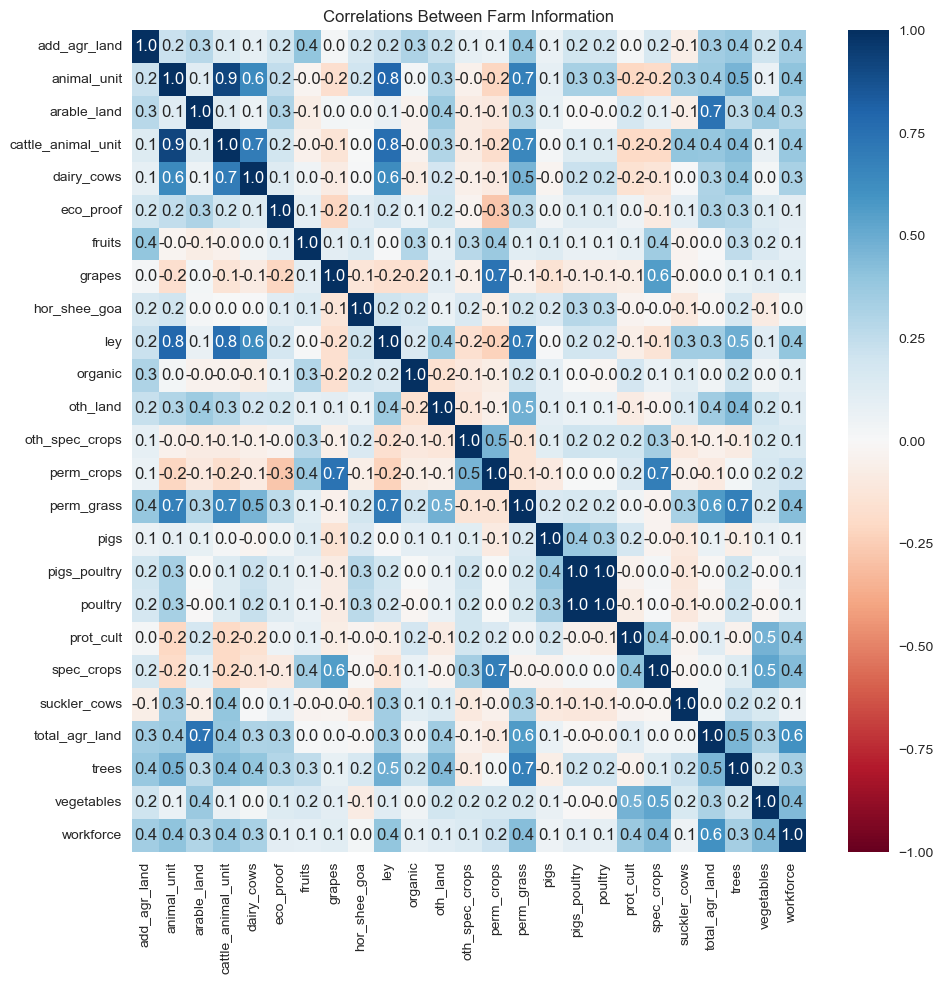

In [13]:
# Correlation Graph 
df_agis_stats = df_agis_sample[df_agis_sample.columns.difference(['id', 'date','qual_landscape', 'farmtype','age','educ'])]
corr_matrix = df_agis_stats.corr(method='spearman')

# Setup
fig, ax = plt.subplots(figsize=(10, 10))

# vmin and vmax control the range of the colormap
sns.heatmap(corr_matrix, cmap='RdBu', annot=True, fmt='.1f',
           vmin=-1, vmax=1)

plt.title("Correlations Between Farm Information")

# Add tight_layout to ensure the labels don't get cut off
plt.tight_layout()
plt.show()

In [14]:
#Correlation with output variable
cor_target = abs(corr_matrix["animal_unit"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

animal_unit           1.000000
cattle_animal_unit    0.914380
dairy_cows            0.638926
ley                   0.796023
perm_grass            0.684432
Name: animal_unit, dtype: float64

In [15]:
# Age Group 
def age_group(age):
    
    """Creates an age bucket for each participant using the age variable.
        Meant to be used on a DataFrame with .apply()."""
    
    # Convert to an int, in case the data is read in as an "object" (aka string)
    age = int(age)
    
    if age < 30:
        bucket = '<30'
    
    # Age 30 to 39 ('range' excludes upper bound)
    if age in range(30, 40):
        bucket = '30-39'
        
    if age in range(40, 50):
        bucket = '40-49'
        
    if age in range(50, 60):
        bucket = '50-59'
   
    if age >= 60:
        bucket = '60+'

    return bucket 

In [16]:
df_agis_sample.columns

Index(['id', 'date', 'total_agr_land', 'workforce', 'trees', 'arable_land',
       'ley', 'perm_grass', 'perm_crops', 'prot_cult', 'add_agr_land',
       'oth_land', 'qual_landscape', 'spec_crops', 'grapes', 'vegetables',
       'fruits', 'oth_spec_crops', 'animal_unit', 'cattle_animal_unit',
       'dairy_cows', 'suckler_cows', 'hor_shee_goa', 'pigs_poultry', 'pigs',
       'poultry', 'eco_proof', 'organic', 'farmtype', 'region', 'age', 'educ'],
      dtype='object')

In [17]:
df_agis_sample['age_group'] = df_agis_sample['age'].apply(age_group)
df_agis_sample.groupby(['age_group', 'farmtype']).size()

age_group  farmtype         
30-39      Arable farming        4
           Livestock             7
           Others                1
40-49      Arable farming        4
           Livestock            12
           Others                2
           Specialized crops     3
50-59      Arable farming       13
           Livestock            31
           Others                6
           Specialized crops     6
60+        Arable farming        2
           Livestock            13
<30        Livestock             1
dtype: int64

In [18]:
df_agis_sample.groupby(['age_group', 'region']).size()

age_group  region         
30-39      Flaachtal           3
           Kohlfirst/Rhein     3
           Stammertal          3
           Thurtal             3
40-49      Andere Gemeinde     2
           Flaachtal           8
           Kohlfirst/Rhein     4
           Stammertal          3
           Thurtal             4
50-59      Andere Gemeinde     5
           Flaachtal          21
           Kohlfirst/Rhein    13
           Stammertal          7
           Thurtal            10
60+        Flaachtal           4
           Kohlfirst/Rhein     4
           Stammertal          2
           Thurtal             5
<30        Stammertal          1
dtype: int64

In [19]:
df_agis_sample.groupby(['age_group', 'educ']).size()

age_group  educ
30-39      1        9
           2        2
           3        1
40-49      1       10
           2        7
           3        4
50-59      1       29
           2       19
           4        8
60+        1        9
           2        4
           3        1
           4        1
<30        2        1
dtype: int64

In [20]:
# Land Information 
df_agis_land = df_agis_sample[df_agis_sample.columns.difference(['id', 'date',
                                                                 'qual_landscape', 'eco_proof',
                                                                 'organic','farmtype', 'age', 
                                                                 'educ', 'age_group'])]
df_land = df_agis_land.groupby(by = df_agis_land.region).sum().reset_index().sort_values(by ='add_agr_land', 
                                                                                         ascending = False)
df_land

,region,add_agr_land,animal_unit,arable_land,cattle_animal_unit,dairy_cows,fruits,grapes,hor_shee_goa,ley,...,pigs,pigs_poultry,poultry,prot_cult,spec_crops,suckler_cows,total_agr_land,trees,vegetables,workforce
1,Flaachtal,384,894.5670,65717,795.6136,494.9370,190,1718,43.2534,13172,...,1.02,55.70,54.68,135,6458,80.9644,106731.000000,1283,4539,81.248040
3,Stammertal,324,378.6680,23319,279.5734,81.8548,436,1248,14.2446,4484,...,0.00,84.85,84.85,0,3430,69.4603,39067.000000,712,2376,35.023970
4,Thurtal,316,581.3148,35868,562.6652,295.8795,272,786,8.5996,8379,...,6.06,10.05,3.99,145,5388,103.4959,59382.000000,1350,5215,54.601920
2,Kohlfirst/Rhein,311,355.6711,52393,311.1951,116.0548,10,1337,18.3560,5960,...,1.02,26.12,25.10,119,5003,79.5177,67017.000000,1022,4036,47.593500
0,Andere Gemeinde,133,54.9843,19238,53.9343,45.1507,1692,249,1.0500,1473,...,0.00,0.00,0.00,616,21810,0.0000,37136.088235,217,17469,94.168207


In [21]:
df_land.describe()

,add_agr_land,animal_unit,arable_land,cattle_animal_unit,dairy_cows,fruits,grapes,hor_shee_goa,ley,oth_land,...,pigs,pigs_poultry,poultry,prot_cult,spec_crops,suckler_cows,total_agr_land,trees,vegetables,workforce
count,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,...,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000
mean,293.60000,453.041040,39307.000000,400.596320,206.77536,520.000000,1067.600000,17.10072,6693.600000,7511.400000,...,1.62000,35.344000,33.724000,203.000000,8417.800000,66.687660,61866.617647,916.800000,6727.00000,62.527127
std,94.46322,310.185732,19614.657287,285.095885,187.70627,672.893751,565.142725,15.99680,4401.289731,4316.929325,...,2.53389,34.782459,35.877619,238.129167,7564.894791,39.300806,28182.149568,464.891063,6095.83329,24.463627
min,133.00000,54.984300,19238.000000,53.934300,45.15070,10.000000,249.000000,1.05000,1473.000000,2611.000000,...,0.00000,0.000000,0.000000,0.000000,3430.000000,0.000000,37136.088235,217.000000,2376.00000,35.023970
25%,311.00000,355.671100,23319.000000,279.573400,81.85480,190.000000,786.000000,8.59960,4484.000000,5293.000000,...,0.00000,10.050000,3.990000,119.000000,5003.000000,69.460300,39067.000000,712.000000,4036.00000,47.593500
50%,316.00000,378.668000,35868.000000,311.195100,116.05480,272.000000,1248.000000,14.24460,5960.000000,6997.000000,...,1.02000,26.120000,25.100000,135.000000,5388.000000,79.517700,59382.000000,1022.000000,4539.00000,54.601920
75%,324.00000,581.314800,52393.000000,562.665200,295.87950,436.000000,1337.000000,18.35600,8379.000000,8481.000000,...,1.02000,55.700000,54.680000,145.000000,6458.000000,80.964400,67017.000000,1283.000000,5215.00000,81.248040
max,384.00000,894.567000,65717.000000,795.613600,494.93700,1692.000000,1718.000000,43.25340,13172.000000,14175.000000,...,6.06000,84.850000,84.850000,616.000000,21810.000000,103.495900,106731.000000,1350.000000,17469.00000,94.168207


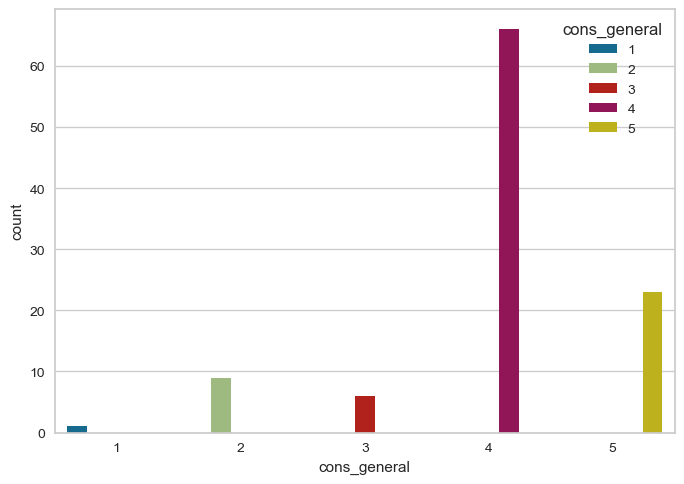

In [22]:
# Climate Change awareness
# Do you think that climate change will have consequences for agriculture in Switzerland?
# How do you assess the consequences of climate change for the economic development of your farm?
climate_awareness = df_acc[['cons_general','cons_farm']]
sns.countplot(data = climate_awareness
            ,x = 'cons_general'
            ,hue = 'cons_general')
 
# Show the plot
plt.show()

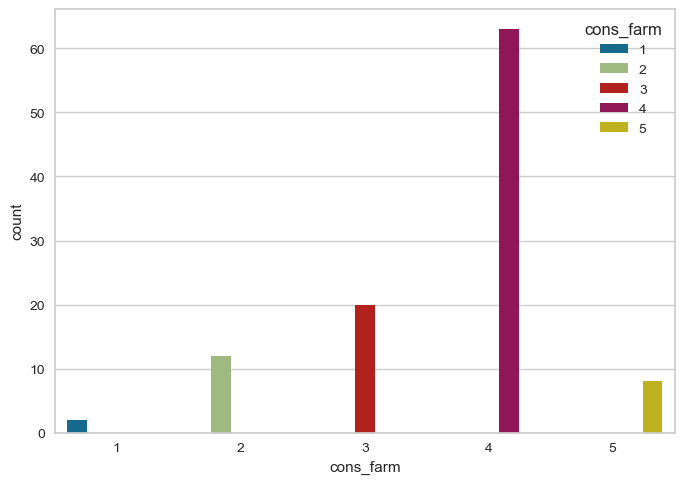

In [23]:
sns.countplot(data = climate_awareness
            ,x = 'cons_farm'
            ,hue = 'cons_farm')
 
# Show the plot
plt.show()

## Clustring Analysis

In [24]:
#df_cluster = pd.concat([df_agis,df_acc,df_accm,df_pvp],axis=1)
# Check if NaN exists
#df_cluster.isnull().values.any()
#df_cluster.head()
farmer_info = ['total_agr_land','workforce','trees','arable_land','ley',
               'perm_grass','perm_crops','prot_cult','add_agr_land',
               'oth_land','qual_landscape','spec_crops','grapes',
               'vegetables','fruits','oth_spec_crops','animal_unit',
               'cattle_animal_unit','dairy_cows','suckler_cows',
               'hor_shee_goa','pigs_poultry','pigs','poultry']
features = df_agis[farmer_info]
features.head()

,total_agr_land,workforce,trees,arable_land,ley,perm_grass,perm_crops,prot_cult,add_agr_land,oth_land,...,fruits,oth_spec_crops,animal_unit,cattle_animal_unit,dairy_cows,suckler_cows,hor_shee_goa,pigs_poultry,pigs,poultry
0,4925.0,1.95406,79,3871,107,793,140,0,0,165,...,0,0,3.9250,3.9250,0.0000,0.9973,0.0000,0.00,0.0,0.00
1,2176.0,6.61310,12,1671,0,98,338,119,0,93,...,0,338,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0,0.00
2,2251.0,1.39384,31,1507,279,380,81,0,4,512,...,0,0,15.9528,15.9028,14.6137,0.0000,0.0000,0.05,0.0,0.05
3,2389.0,1.99523,3,1969,71,322,0,0,27,350,...,0,0,52.9000,0.0000,0.0000,0.0000,0.0000,52.90,0.0,52.90
4,3205.0,3.09942,39,1911,675,461,117,0,14,112,...,0,117,56.5108,54.9184,40.3041,0.0000,1.3424,0.25,0.0,0.25


In [25]:
#  Standardization
scaler = StandardScaler()
X = scaler.fit_transform(features)

In [26]:
# Elbow method
sse = []

kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

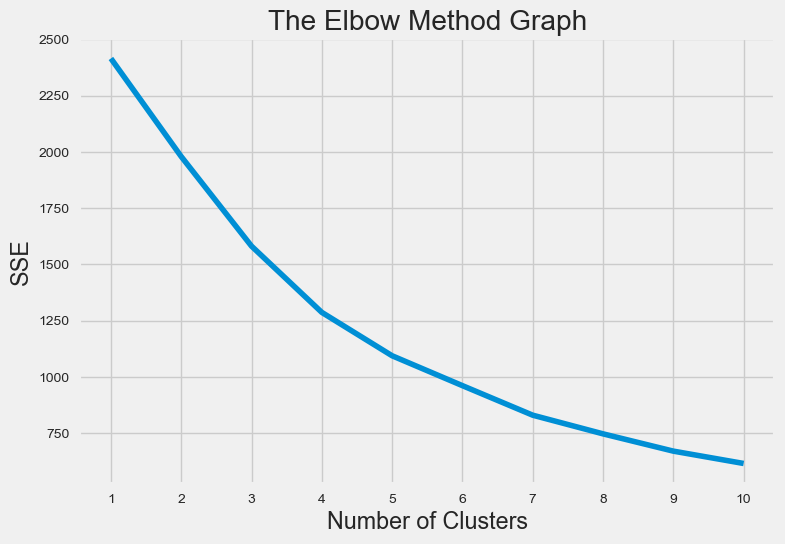

In [27]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.title('The Elbow Method Graph')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

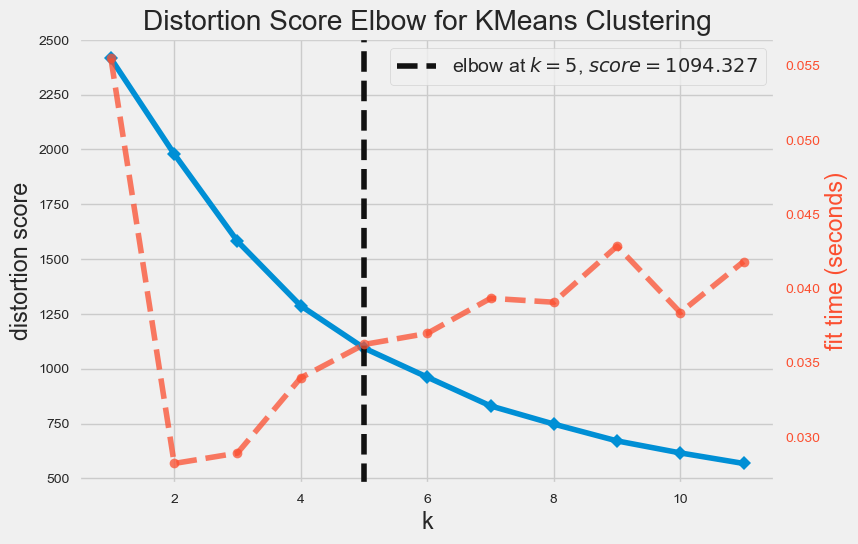

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
visualizer = KElbowVisualizer(kmeans, k=(1,12))
visualizer.fit(X)        
visualizer.show() 

### K-means

In [29]:
kmeans = KMeans(n_clusters=5, **kmeans_kwargs)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [30]:
features['cluster'] = y_kmeans
features.head()

,total_agr_land,workforce,trees,arable_land,ley,perm_grass,perm_crops,prot_cult,add_agr_land,oth_land,...,oth_spec_crops,animal_unit,cattle_animal_unit,dairy_cows,suckler_cows,hor_shee_goa,pigs_poultry,pigs,poultry,cluster
0,4925.0,1.95406,79,3871,107,793,140,0,0,165,...,0,3.9250,3.9250,0.0000,0.9973,0.0000,0.00,0.0,0.00,0
1,2176.0,6.61310,12,1671,0,98,338,119,0,93,...,338,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0,0.00,0
2,2251.0,1.39384,31,1507,279,380,81,0,4,512,...,0,15.9528,15.9028,14.6137,0.0000,0.0000,0.05,0.0,0.05,0
3,2389.0,1.99523,3,1969,71,322,0,0,27,350,...,0,52.9000,0.0000,0.0000,0.0000,0.0000,52.90,0.0,52.90,4
4,3205.0,3.09942,39,1911,675,461,117,0,14,112,...,117,56.5108,54.9184,40.3041,0.0000,1.3424,0.25,0.0,0.25,3


Text(0.5, 1.0, 'Clusters of Farmers')

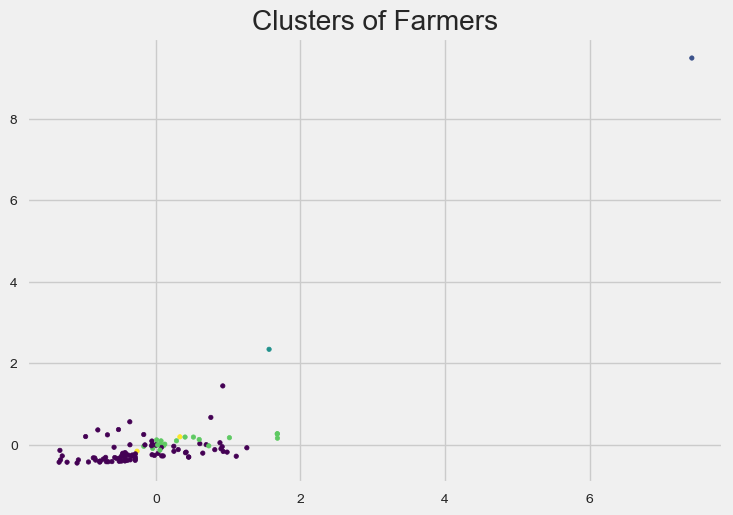

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='viridis')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=3, c='red', label = 'Centroids')
plt.title('Clusters of Farmers')

### TSNE

In [32]:
tsne = TSNE(n_components=3, verbose=1, random_state=42)
z = tsne.fit_transform(X) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 105 samples in 0.000s...
[t-SNE] Computed neighbors for 105 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 105 / 105
[t-SNE] Mean sigma: 1.603118
[t-SNE] KL divergence after 250 iterations with early exaggeration: 110.734718
[t-SNE] KL divergence after 1000 iterations: 1.666423


[Text(0.5, 1.0, 'Farmers data T-SNE projection')]

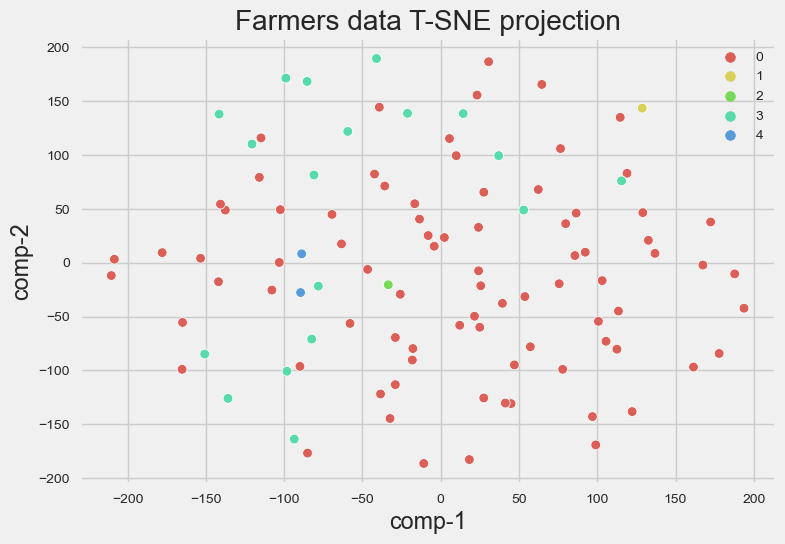

In [33]:
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
#labels_scale = y_kmeans.labels_
sns.scatterplot(x="comp-1", y="comp-2",hue=y_kmeans,
                palette=sns.color_palette("hls", 7),
                data=df).set(title="Farmers data T-SNE projection") 

## Feature Importance

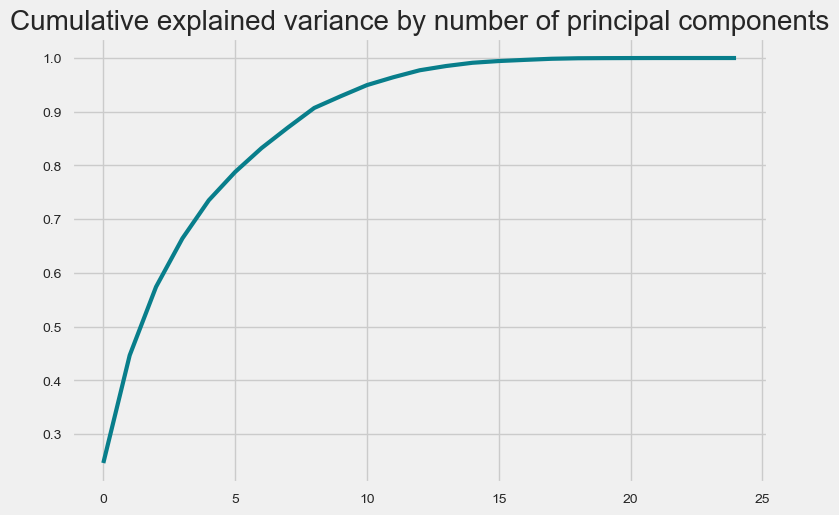

In [34]:
pca = PCA().fit(scaler.fit_transform(features))

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [35]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    index=features.columns
)
loadings.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
total_agr_land,0.899200,0.160153,-0.093744,-0.041245,-0.043131,0.008864,0.096518,-0.122051,0.063997,-0.154318,...,0.001452,-0.084361,-0.129359,0.011169,0.011542,0.002741,0.004082,-7.374943e-33,-4.784743e-32,2.906370e-33
workforce,0.857970,0.453155,-0.076896,0.071526,-0.138295,0.005756,-0.001345,0.134272,-0.063844,0.029242,...,-0.030829,-0.027622,-0.030953,-0.050441,-0.048985,-0.013597,-0.016173,1.081252e-34,6.360658e-32,-1.574742e-32
trees,0.472931,-0.235500,0.181455,-0.206286,0.478554,-0.192945,-0.101412,-0.226368,-0.124293,-0.139953,...,0.012050,-0.022069,0.011913,0.001893,0.000522,-0.000935,-0.000029,-1.678395e-33,1.925641e-33,-4.654438e-34
arable_land,0.762752,0.315403,-0.309646,0.019190,-0.025302,0.022270,0.155383,-0.254517,0.091796,-0.118141,...,0.025997,0.095600,0.108690,0.003969,-0.009391,-0.002082,-0.002497,7.121667e-34,5.779169e-32,-2.167420e-33
ley,0.544929,-0.685029,0.023190,-0.120569,-0.072140,-0.022343,-0.032541,0.268897,0.026063,-0.057757,...,-0.005824,-0.061600,0.070486,0.002954,0.001289,0.000519,-0.000163,-1.938319e-32,7.700923e-33,3.385267e-33


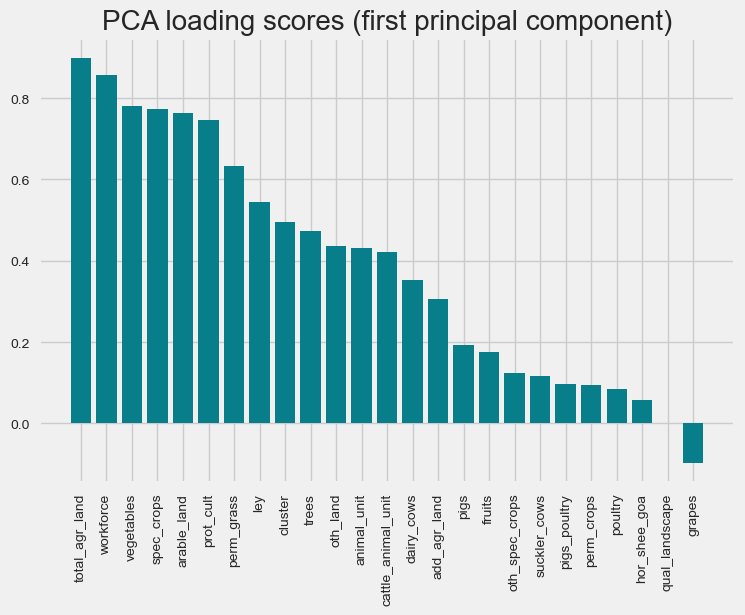

In [36]:
pc1_loadings = loadings.sort_values(by=0, ascending=False)[[0]]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

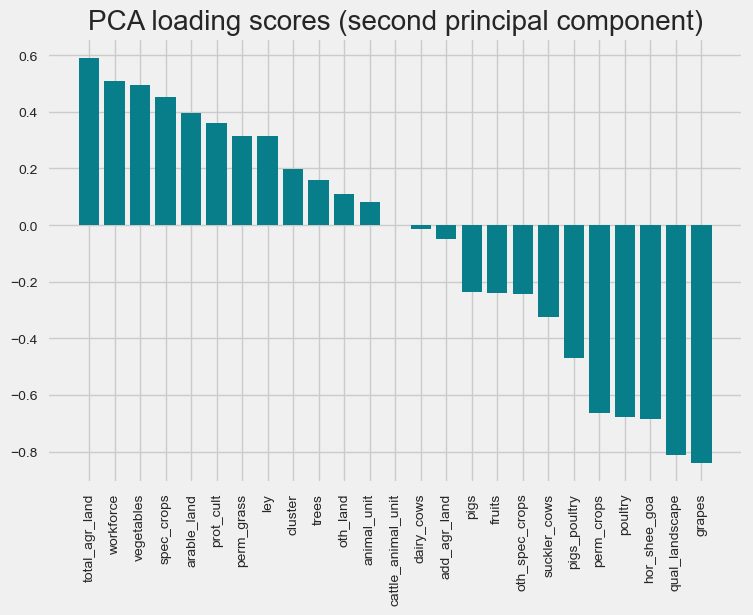

In [37]:
pc2_loadings = loadings.sort_values(by=1, ascending=False)[[1]]
pc2_loadings = pc2_loadings.reset_index()
pc2_loadings.columns = ['Attribute', 'CorrelationWithPC2']

plt.bar(x=pc1_loadings['Attribute'], height=pc2_loadings['CorrelationWithPC2'], color='#087E8B')
plt.title('PCA loading scores (second principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

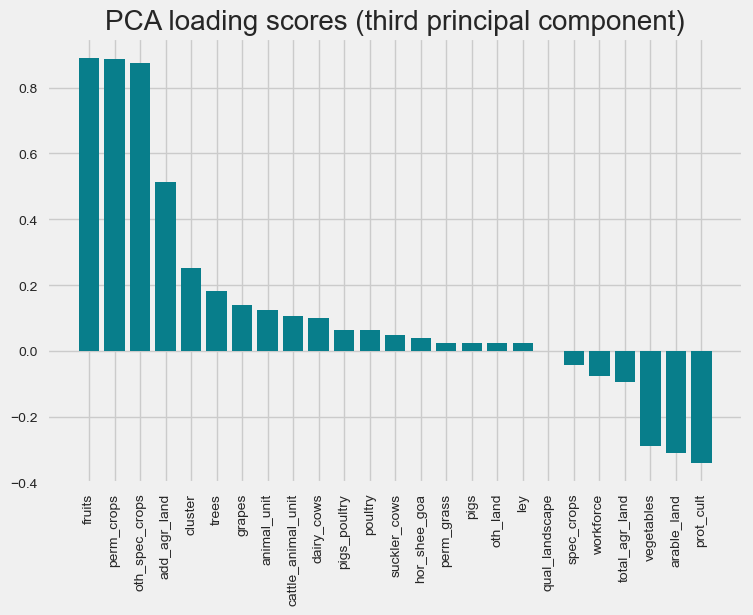

In [38]:
pc3_loadings = loadings.sort_values(by=2, ascending=False)[[2]]
pc3_loadings = pc3_loadings.reset_index()
pc3_loadings.columns = ['Attribute', 'CorrelationWithPC3']

plt.bar(x=pc3_loadings['Attribute'], height=pc3_loadings['CorrelationWithPC3'], color='#087E8B')
plt.title('PCA loading scores (third principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

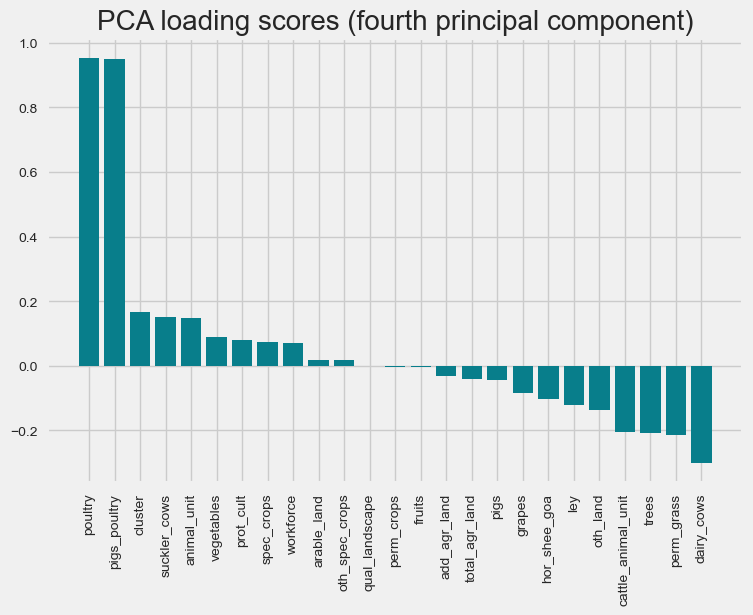

In [39]:
pc4_loadings = loadings.sort_values(by=3, ascending=False)[[3]]
pc4_loadings = pc4_loadings.reset_index()
pc4_loadings.columns = ['Attribute', 'CorrelationWithPC4']

plt.bar(x=pc4_loadings['Attribute'], height=pc4_loadings['CorrelationWithPC4'], color='#087E8B')
plt.title('PCA loading scores (fourth principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

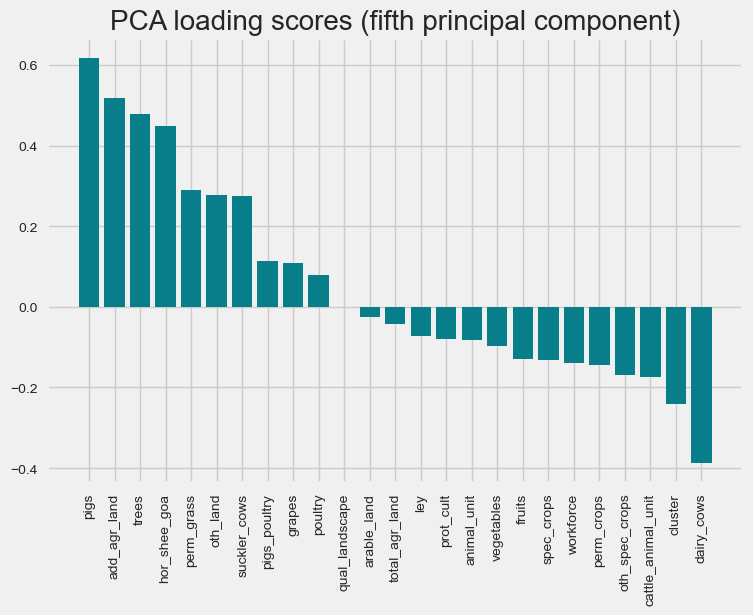

In [40]:
pc5_loadings = loadings.sort_values(by=4, ascending=False)[[4]]
pc5_loadings = pc5_loadings.reset_index()
pc5_loadings.columns = ['Attribute', 'CorrelationWithPC5']

plt.bar(x=pc5_loadings['Attribute'], height=pc5_loadings['CorrelationWithPC5'], color='#087E8B')
plt.title('PCA loading scores (fifth principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()